# Python機械学習 勉強会 第五回「教師あり学習4」

参考文献：  
Pythonではじめる機械学習　2章  
https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

scikit-learnドキュメント：  
https://scikit-learn.org/stable/documentation.html

In [1]:
%matplotlib inline
from preamble import *
from sklearn.model_selection import train_test_split

<br>

---

## はじめに

今回は以下の内容を取り組む

* 教師あり機械学習アルゴリズム
    * ニューラルネットワーク(ディープラーニング)
* クラス分類器の不確実性推定
    * 決定関数(Decision Function)
    * 確率の予測
    * 多クラス分類の不確実性

<br>

---

## 2. 教師あり機械学習アルゴリズム
### 2-6. ニューラルネットワーク(ディープラーニング)

この勉強会では、ニューラルネットワークアルゴリズムの中でも比較的簡単な  
多層パーセプトロン(multilayer perceptron: MLP)によるクラス分類と回帰に触れる。

より複雑なディープラーニングについてはこの勉強の範疇を超えるので、  
別の研修、勉強会などで学んで欲しい。

<br>

#### 2-6-1. ニューラルネットワークモデル

MLPは、線形モデルを一般化し、決定までに複数のステージで計算するものとみなせる。

線形モデルによる一般的な予測式は以下のようになる。

$$
\hat{y} = w[0] × x[0] + w[1] × x[1] + … + w[p] × x[p] + b
$$

wとb：学習されたモデルのパラメータ  
$\hat{y}$：モデルからの予測

これを図示すると次のようになる。

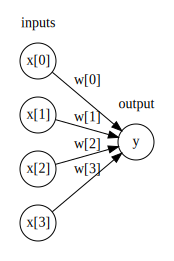

In [2]:
display(mglearn.plots.plot_logistic_regression_graph())

左側のノード群は入力特徴量をいみする。  
出力yは入力に対する重み付き和となっている。

MLPでは、この重み付き和の計算が繰り返し行われる。

<Br>
    
中間ステップを意味する**隠れ層**と呼ばれるノード群がある。

各入力特徴量と隠れ層の各ノード間に係数(重み)があり、  
隠れ層の各ノードと出力ノード間にも存在する。

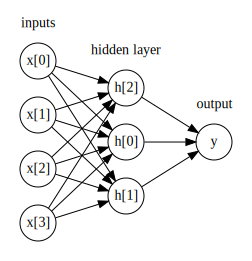

In [3]:
display(mglearn.plots.plot_single_hidden_layer_graph())

このままでは、単純に1つの重み付き和を計算するだけなので、  
MLPでは線形モデルよりも強力にするための仕掛けがある。

MLPは、個々の重み付き和を計算したら、その結果に対して非線形関数を適用している。

上の図で説明する。

$$
y = v_0 * h_0(w_0 * x_0 + w_1 * x_1 + w_2 * x_2 + w_3 * x_3) + …
$$
h：非線形関数  
v：隠れ層hと出力yとの間の重み  
w：入力xと隠れ層hとの間の重み

<br>

一般的に使われている非線形関数は、次の2つ。
* relu(rectified linear unit: 正規化線形関数)
* tanh(hyperboloci tangent: 双曲正接関数)

Text(0, 0.5, 'relu(x), tanh(x)')

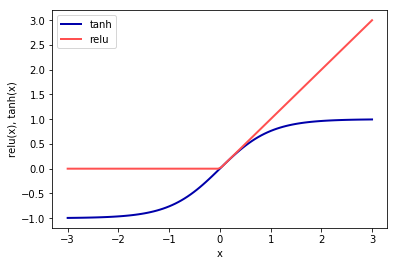

In [4]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

reluは0以下を切り捨てる単純な関数であり、  
tanhは-1、+1にそれぞれ飽和する。

さらに、下の図のように隠れ層を追加することもできる。

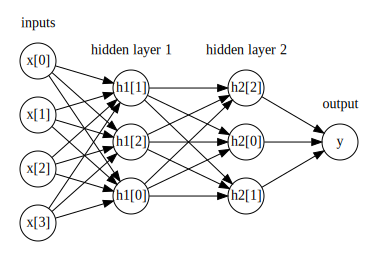

In [5]:
mglearn.plots.plot_two_hidden_layer_graph()

この隠れ層をたくさん持つ大きなニューラルネットワークを、**ディープラーニング**と呼ぶ。

<br>

#### 2-6-2. ニューラルネットワークのチューニング

次に、MLPをtwo_monnsデータに適用して確認してみる。

Text(0, 0.5, 'Feature 1')

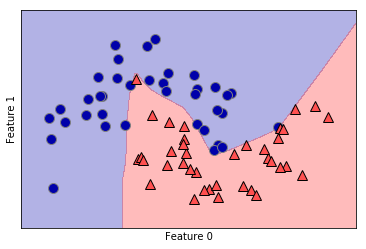

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

ニューラルネットワークは、比較的なめらかな決定境界を学習している。

MLPのデフォルトでは100の隠れ層を用いているが、このような小さなデータセットに対しては過剰である。  
これくらいなら隠れ層のユニットの数を減らし、モデルを単純にしても問題ない。

Text(0, 0.5, 'Feature 1')

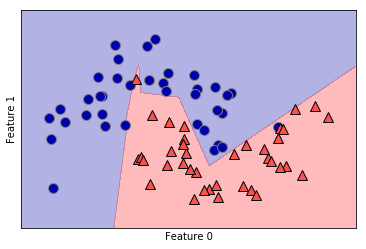

In [7]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

決定境界は少しギザギザになる。  

また、デフォルトの非線形関数は「relu」が用いられる。  
決定境界をもう少しなめらかにしたければ、隠れ層を増やしたり、「tanh」を用いればいい。

Text(0, 0.5, 'Feature 1')

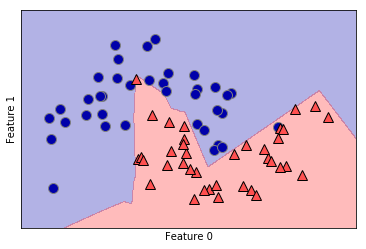

In [8]:
# それぞれ10ユニットの隠れ層を2層
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

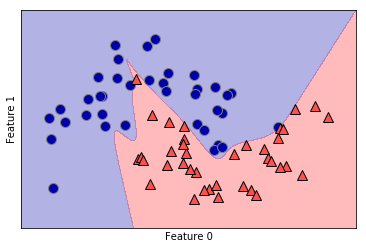

In [9]:
# さらに非線形活性化関数にtanhを使う
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<br>

さらに、L2ペナルティ(正則化)で重みを0に近づけることで、  
ニューラルネットワークの複雑さを制御できる。

MLPではこのパラメータはalphaで指定できる。(線形モデルと同じ)  
デフォルトでは非常に小さな値(弱い正則化)が設定される。

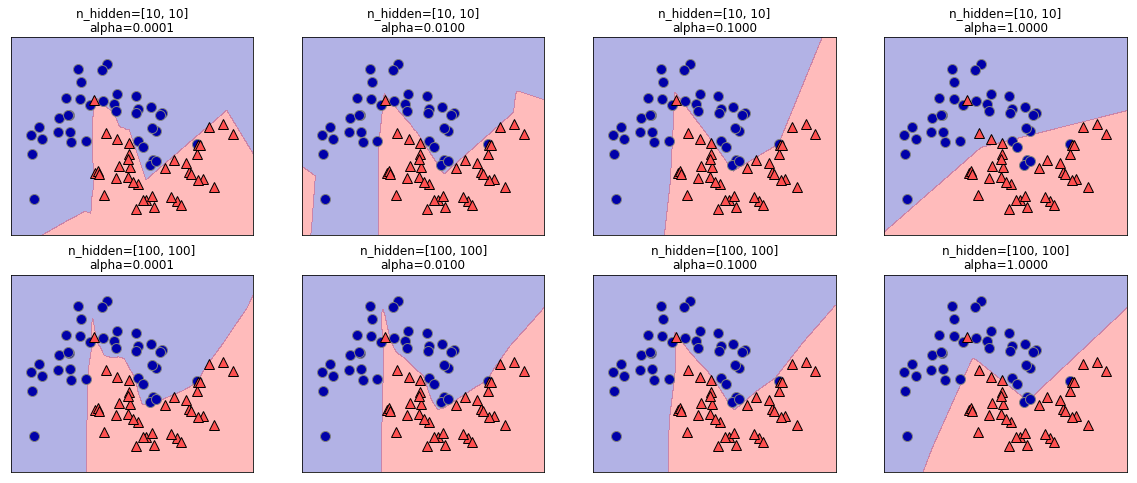

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

<br>

ニューラルネットワークでは学習を開始する前に、重みを乱数で割り当てる。  
この乱数による初期化の影響が学習されるモデルに影響を与える。

次の図は、同じパラメータセットで学習したものだが、
乱数シードによって重みの初期値が変わっている。

ネットワークが大きくなれば、初期化の影響は気にしなくていいが、  
小さなネットワークでは留意する必要がある。

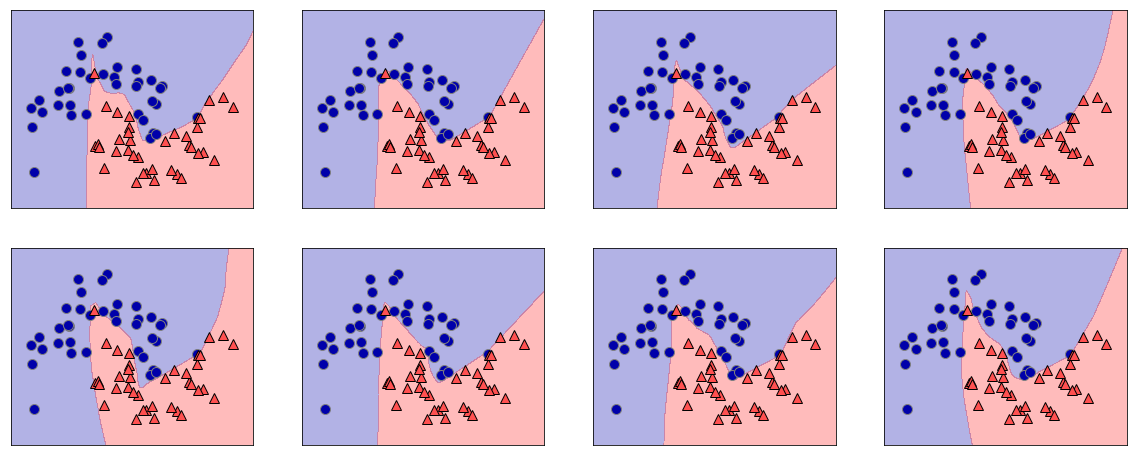

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)


次に、cancerデータセットに対してMLPを適用してみる。

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[  28.11    39.28   188.5   2501.       0.163    0.345    0.427    0.201
    0.304    0.097    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.079    0.03    36.04    49.54   251.2   4254.
    0.223    1.058    1.252    0.291    0.664    0.207]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set\t: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set\t\t: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set	: 0.94
Accuracy on test set		: 0.92


あまり精度が高いとは言えない。  

これはSVMの例でも見たように、データのスケールの問題。  
理想的には平均が0で分散1であるのが望ましい。

ここでは理解のために主導でスケーリングするが、  
次の章でそれを行うクラス***StandardScaler***を紹介する。

In [14]:
# 訓練セットの特徴量ごとの平均値をさんしゅつ
mean_on_train = X_train.mean(axis=0)

# 訓練セットの特徴量ごとの標準偏差を算出
std_on_train = X_train.std(axis=0)

# 平均を引き、標準偏差の逆数でスケール変換する
# これで平均0, 分散1になる
X_train_scaled = (X_train - mean_on_train) / std_on_train

# まったく同じ変換をテストセットにも実施
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set\t: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set\t\t: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set	: 0.991
Accuracy on test set		: 0.965


C:\Users\0060778-z100\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


精度が改善された。

今回、このモデルに対して学習繰り返し回数が最大値に達した、という警告が出ている。  
つまり、学習の繰り返し回数を増やすべき、と指摘されている。

In [15]:

mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set\t: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set\t\t: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set	: 1.000
Accuracy on test set		: 0.972


モデルはかなり高性能になった。  

まだ訓練精度とテスト精度に差があるため、  
正則化を施してモデルを単純にすれば、汎化性能が上がる余地がある。

In [16]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set\t: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set\t\t: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set	: 0.988
Accuracy on test set		: 0.972


### TIPS

ここでは性能は向上しなかった。  

これは、用いたデータセットの特性であり、  
他の線形モデルや決定木ベース、SVMなどの協力なアルゴリズムにおいても、  
テスト精度は同じ0.972が限界となっている。

<br>

ニューラルネットワークが学習した内容を解析するのは難しいが可能だ。  

1つの方法は、モデルの重みを見てみる事。  
cancerデータセットに適用してみる。

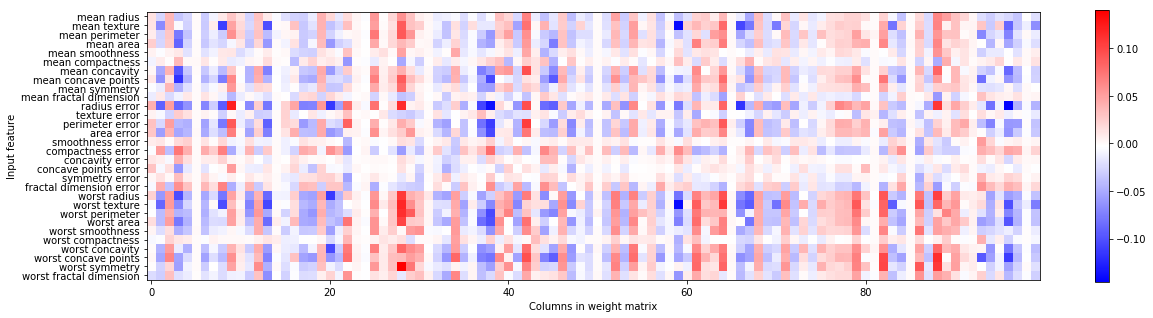

In [17]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='bwr')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

上の図は、入力と第1隠れ層との間の重みを学習したもの。  
各行が特徴量で、各列が100の隠れ層ユニットに対応されている。  
赤色が大きな正の値、青色が大きな負の値。

分かりにくいが、1つの推論として言える事は、  
「すべての隠れ層ユニットに対して重みが小さい特徴量は重要ではない」

上の図で言えば、「白い」行の特徴量は、重要ではないか、  
これらの特徴量をニューラルネットワークが使えるように表現できていなかったか、のどちらかだ。

<br>

***MLPClassifier***は、一般的なニューラルネットワークを簡単なインターフェースで扱えるが、  
より柔軟な、大きなモデルを使いたいなら、sciki-learnではなく、他のライブラリを使うべきである。

有名どころとしては、keras, tensor-flow, lasagnaなどが挙げられる。

<br>

#### 2-6-3. 利点、短所、パラメータ

ニューラルネットワークの最大の利点は、  
大量のデータを費やせば非常に複雑なモデルを構築できること。

十分な計算時間とデータを用意できるなら、他の機械学習アルゴリズムに勝てることが多い。

裏返せばこれは短所になる。  
多数のデータが必要であり、訓練時間もかかる。  

最も重要なパラメータは、隠れ層の数と層あたりのユニットの数。  
層あたりのユニットの数は、入力層と同じにすることが多いが、数千より大きくなることはあまりない。

<br>

一般的パラメータのチューニング方法
1. まずは過学習になるような大きなネットワークを作って、  
十分に学習できることを確認する。
1. ネットワークを小さくするか、正則化を強化して汎化性能を向上させる。

<br>

また、パラメータのチューニングに用いる代表的なアルゴリズムは以下3つ。  
* adam：デフォルト。データのスケールに敏感
* lbfgs：頑強だが訓練に時間がかかる
* sgd：研究者が多く使った折、設定パラメータが多い。

まずはadamかlbfgsを使っておけばいい。

<br>

ここでは、ニューラルネットワークの極一部のみ紹介した。  
どのモデルを選択するか、パラメータのチューニング、など一種の技芸と言えるほど奥深いので、  
興味ある方は探求されたし。

<br>

---

## 3. クラス分類の不確実性推定

sciki-learnの有用な機能の1つに、クラス分類器の予測に対する不確実性推定がある。  
これは、予測に対してどれくらい確かなのかを確認できる方法。

利用できる関数として以下2つが存在する。
1. ***decision_function***
2. ***predict_proba***

scikit-learnのクラス分類器は、少なくともどちらかを実装している。

例として、合成2次元データセットを***GradientBoostingClassifier***で分類した際の動作を確認する。

詳細は公式サイト：
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# わかりやすいようにクラスをblue, redにする
y_named = np.array(["blue", "red"])[y]

# 全ての配列は整合するように分割される。
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# 勾配ブースティングモデルを構築
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

<br>

---

## 3-1. 決定関数(Decision Function)

In [19]:
print("X_test.shape:", X_test.shape)
print("Decision function shape:",
      gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
Decision function shape: (25,)


***decision_function***では、あるデータポイントが「陽性」(この場合はクラス1=red)であると、  
モデルが信じている度合いが格納される。

正であれば陽性クラス、負であれば陰性クラスを意味する。

In [20]:
print("Decision function:", gbrt.decision_function(X_test)[:6])

Decision function: [ 4.136 -1.702 -3.951 -3.626  4.29   3.662]


In [21]:
print("Thresholded decision function:\n",
      gbrt.decision_function(X_test)[:6] > 0)
print("Predictions:\n", gbrt.predict(X_test[:6]))

Thresholded decision function:
 [ True False False False  True  True]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red']


<br>

2クラス分類では、***classes_***属性に、次の値が格納される

* 第一エントリ：陰性クラス
* 第二エントリ：陽性クラス

In [22]:
gbrt.classes_

array(['blue', 'red'], dtype='<U4')

<br>

次に示す図は、決定境界と、2次元平面上のすべての点に対するdecision_functionの値で色を付けた図を並べている。　　

訓練データは●で、テストデータは▲で表現している。

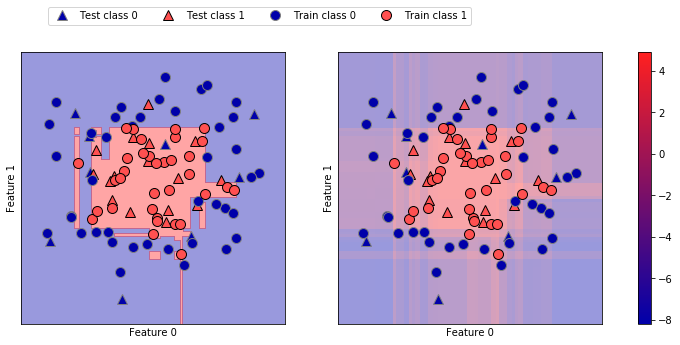

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

予測された値だけではなく、確信度についても表現できている。

<br>

---

## 3-2. 確率の予測

***predict_proba***の出力は、それぞれのクラスに属する確率。  
形は(n_samples, クラスの数)となる。

In [24]:
print("Shape of probabilities:", gbrt.predict_proba(X_test).shape)

Shape of probabilities: (25, 2)


<br>

各行の第1エントリはクラス1の予測確率、第2エントリはクラス2の予測確率が格納される。  
* ***classes_***属性で定義されている順番

また、確率なので常に0から1の値をとり、双方の和は1となる。

In [25]:
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test[:6]))

print("\nPredictions:\n", gbrt.predict(X_test[:6]))

Predicted probabilities:
[[0.016 0.984]
 [0.846 0.154]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]]

Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red']


In [26]:
gbrt.classes_

array(['blue', 'red'], dtype='<U4')

<br>

このでモデルは比較的確信度が高いと言える。  
ただし、確信度=正答率ではない。

過学習したモデルでは、間違っている場合でさえ高い確信度で予測する傾向にある。

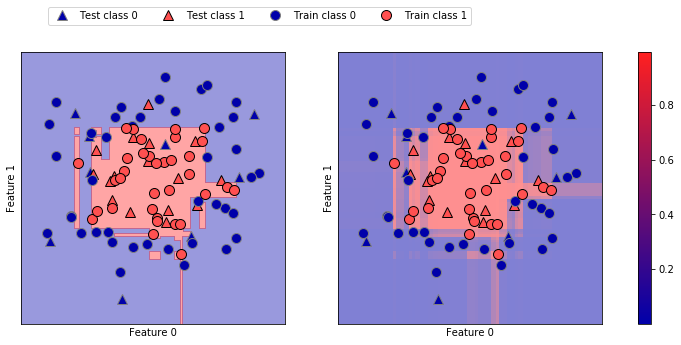

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # 訓練データポイントとテストデータポイントをプロット
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

<br>

---

## 3-3. 多クラス分類の不確実性

多クラス分類の例として、3クラス分類問題であるirisデータセットに適用してみる。

In [28]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

<br>

***decision_function***の結果は、(n_samples, n_classes)の形になる。

In [29]:
print("Decision function shape:", gbrt.decision_function(X_test).shape)

# 決定関数の最初のいくつかを表示
print("Decision function:")
print(gbrt.decision_function(X_test)[:6, :])

Decision function shape: (38, 3)
Decision function:
[[-0.529  1.466 -0.504]
 [ 1.512 -0.496 -0.503]
 [-0.524 -0.468  1.52 ]
 [-0.529  1.466 -0.504]
 [-0.531  1.282  0.215]
 [ 1.512 -0.496 -0.503]]


In [30]:
gbrt.classes_

array([0, 1, 2])

In [31]:
# 各データポイントに対して、確信度が最大になるクラスを選択
#np.argmaxは配列の最大要素のインデックスを返す
print("Argmax of decision function:")
print(np.argmax(gbrt.decision_function(X_test), axis=1))

print("Predictions:")
print(gbrt.predict(X_test))

print("\ndecision function is equal to predictions : ", 
     np.all(np.argmax(gbrt.decision_function(X_test), axis=1)==gbrt.predict(X_test)) )

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]

decision function is equal to predictions :  True


<br>

***predict_proba***の結果も、(n_samples, n_classes)の形になる。

In [32]:
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test)[:6])

# 各行の和は1となる
print("\nSums:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

Predicted probabilities:
[[0.107 0.784 0.109]
 [0.789 0.106 0.105]
 [0.102 0.108 0.789]
 [0.107 0.784 0.109]
 [0.108 0.663 0.228]
 [0.789 0.106 0.105]]

Sums: [1. 1. 1. 1. 1. 1.]


In [33]:
print("Argmax of predicted probabilities:")
print(np.argmax(gbrt.predict_proba(X_test), axis=1))

print("Predictions:")
print(gbrt.predict(X_test))

print("\npredicted probabilities is equal to predictions : ", 
     np.all(np.argmax(gbrt.predict_proba(X_test), axis=1)==gbrt.predict(X_test)) )

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]

predicted probabilities is equal to predictions :  True


<br>

クラスが文字列であったり、0から始まる整数で表現されていない場合には、  
クラス分類器のclass_属性を使って、実際のクラス名を使う。

In [34]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# irisデータセットのクラス名で表示
named_target = iris.target_names[y_train]

logreg.fit(X_train, named_target)
print("unique classes in training data:", logreg.classes_)
print("\npredictions:\n", logreg.predict(X_test)[:10])

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("\nargmax of decision function:", argmax_dec_func[:10])
print("\nargmax combined with classes_:\n",
      logreg.classes_[argmax_dec_func][:10])

unique classes in training data: ['setosa' 'versicolor' 'virginica']

predictions:
 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']

argmax of decision function: [1 0 2 1 1 0 1 2 1 1]

argmax combined with classes_:
 ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


C:\Users\0060778-z100\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\0060778-z100\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<br>

---

## まとめ

ここまでで、モデルの複雑さや汎化性能、学習不足や過学習といった概念を学んできた。

また、機械学習アルゴリズムについて、以下のような知見を得られた。

1. 最近棒法：  
小さいデータに対してベースラインになりえる。説明が容易。

1. 線形モデル：  
最初に試すべきアルゴリズム。非常に大きな、高次元のデータセットに対応する。

1. 決定木：  
高速。データのスケールを考慮する必要がない。可視化で説明が容易。

1. ランダムフォレスト：  
決定木より頑強で強力。デフォルトパラメータでもうまく機能する。  
高次元で疎なデータには適さない  

1. 勾配ブースティング決定木：  
ランダムフォレストより少し精度が高い。  
訓練時間はかかるが予測が早くメモリ使用量も小さい。パラメータに敏感。  

1. サポートベクタマシン：  
同じようなスケールをもつ特徴量からなる中規模なデータセットに対しては強力。  
スケール調整必須。パラメータに敏感。

1. ニューラルネットワーク：
非常に複雑なモデルを構築できる。特に大きなデータセットに対して有効。  
スケール調整必須。パラメータに敏感。  
大きなモデルは訓練に時間がかかる。

<br>

一般的には、まず線形モデルや最近傍法などの簡単なモデルでどれくらい精度が得られるか試し、  
データをより深く理解できたらランダムフォレストや勾配ブースティング、SVM、ニューラルネットワーク  
などの複雑なモデルに移行していくと良い。

次からは「教師なし学習」について詳しく見ていく。

<br>

---

## おわり

誤字脱字、不明点あればご連絡ください。